In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and 
# copy the path for the csv file

data =  pd.read_csv('creditt.zip', compression='zip')
# Load the dataset  # Update with the correct path if necessary

# Display the first few rows of the dataset to understand its structure
data.head()

# Describe the data
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Check for fraud vs. valid transactions
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

# Print fraud ratio
outlierFraction = len(fraud) / float(len(valid))
print(f"Outlier fraction (fraud): {outlierFraction}")
print(f"Fraud cases: {len(fraud)}")
print(f"Valid transactions: {len(valid)}")


Outlier fraction (fraud): 0.0017304750013189597
Fraud cases: 492
Valid transactions: 284315


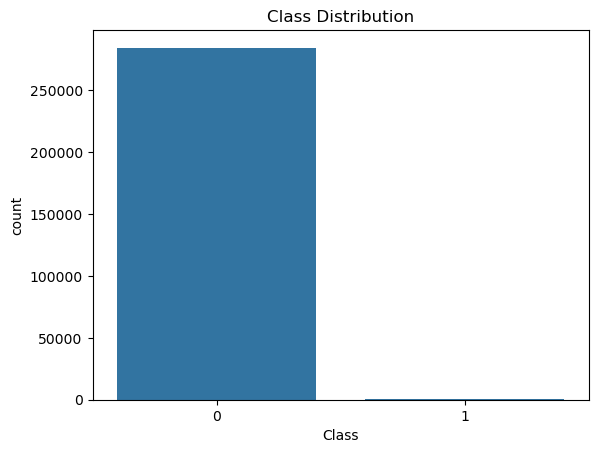

In [4]:
# Check the class distribution to see if the dataset is imbalanced

sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


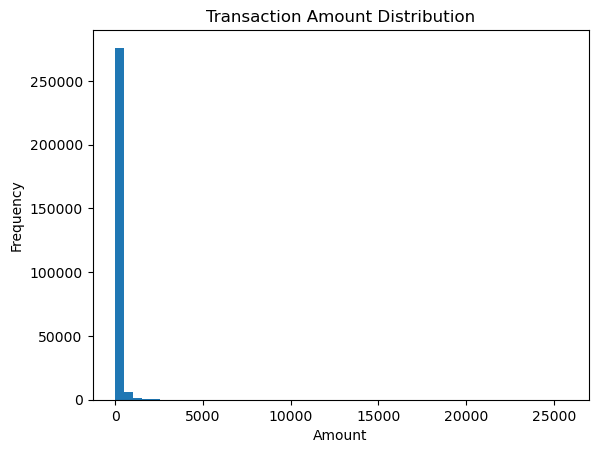

In [5]:
# Visualizing features (example for 'Amount')
plt.hist(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

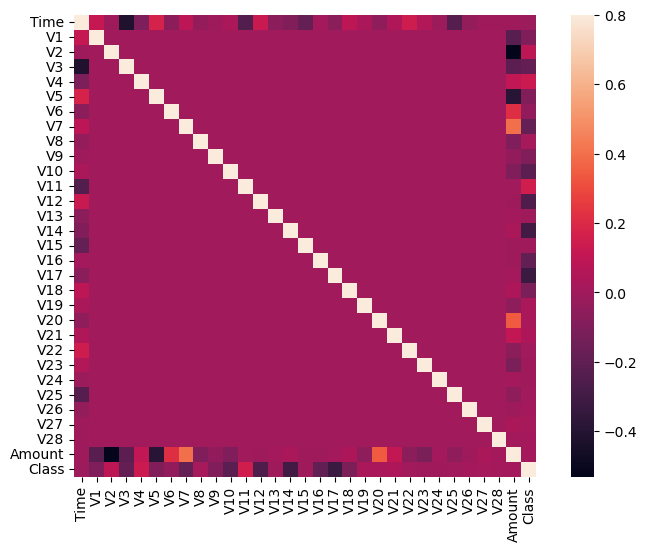

In [6]:
# Plotting correlation matrix to visualize relationships between features
corrmat = data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()


In [7]:
# Separate features and target variable
X = data.drop('Class', axis=1)
Y = data['Class']


In [8]:

# Split data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)



In [9]:
# Check data types of each column
print(X.dtypes)

# Check for missing values
print(X.isnull().sum())

# Optionally, drop rows with missing values or impute them (if necessary)
X = X.dropna()  # Or, use an imputation method if you prefer


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [10]:
# Initialize the RandomForest model with limited trees
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

# Try fitting the model
rfc.fit(xTrain, yTrain)


RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
# Make predictions on the test set
yPred = rfc.predict(xTest)


In [12]:
# Evaluate performance using various metrics
acc = accuracy_score(yTest, yPred)
print(f"Accuracy: {acc}")

prec = precision_score(yTest, yPred)
print(f"Precision: {prec}")

rec = recall_score(yTest, yPred)
print(f"Recall: {rec}")

f1 = f1_score(yTest, yPred)
print(f"F1-Score: {f1}")

MCC = matthews_corrcoef(yTest, yPred)
print(f"Matthews Correlation Coefficient: {MCC}")


Accuracy: 0.9994908886626171
Precision: 0.9726027397260274
Recall: 0.7244897959183674
F1-Score: 0.8304093567251462
Matthews Correlation Coefficient: 0.8392036225480524


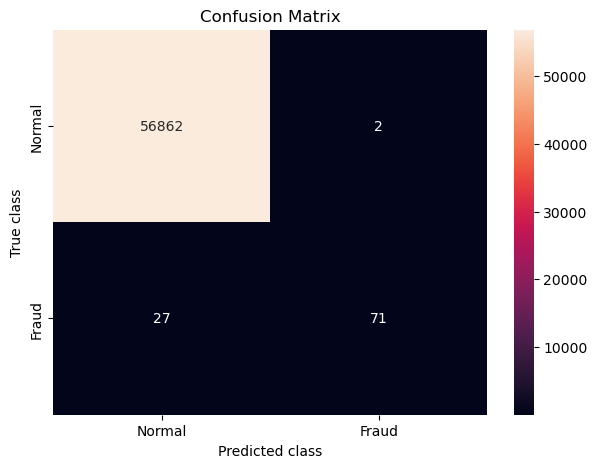

In [13]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
